# Práctica 1: Simulando la medida de un fotón

$\newcommand{\ket}[1]{|{#1}\rangle}\newcommand{\bra}[1]{\langle{#1}|}\DeclareMathOperator{\Tr}{Tr}$Consideramos la medida de la polarización de un fotón de acuerdo al siguiente montaje experimental:

![title](figs/medida-polarizacion.svg)

Para simular este proceso, modelamos el fotón de la figura como una matriz de densidad de probabilidad $\rho$, y el proceso de medida con respecto a las polarizaciones $\leftrightarrow$ y $\updownarrow$, a través del POVM:
  \begin{align}
      \Pi_{0} &= \biggl[\begin{matrix} 1&0\\0&0 \end{matrix}\biggr]    
       &\text{(polarización $\leftrightarrow$),}\\
      \Pi_{1} &= \biggl[\begin{matrix} 0&0\\0&1 \end{matrix}\biggr]
       &\text{(polarización $\updownarrow$).}
  \end{align}

## 1. Medida de un estado puro

Definimos el estado cuántico de un fotón con polarización lineal con un ángulo $\theta$ como
  \begin{align}
    \ket{\theta} = \Biggl[\begin{matrix}\cos(\theta)\\
                                        \sin(\theta)\end{matrix}\Biggr]
  \end{align}
de forma que la matriz de densidad de probabilidad correspondiente
está dada por $\rho = \ket{\theta}\bra{\theta}$.
Entonces, las probabilidades de medir cada una de las polarizaciones 
$\leftrightarrow$ y $\updownarrow$ se corresponden a:
  \begin{align}
    \Pr\{\leftrightarrow\} &= \Tr\left[ \Pi_{0} \rho \right],\quad
    \Pr\{\updownarrow\} = \Tr\left[ \Pi_{1} \rho \right].
  \end{align}
  
  
  
  




*Definimos la función en Matlab, que genera el estado $\rho$ de un fotón con polatización $\theta$:*

In [1]:
function [rho] = foton(theta)
  rho = [cos(theta); sin(theta)]*[cos(theta); sin(theta)]';
end

*y consideramos la siguiente inicialización, común a todos los apartados:*

In [2]:
Pi0 = [1 0;0 0];
Pi1 = [0 0;0 1];

**1.1.** Considere un fotón con $\theta=0$.
Obtenga las probabilidades $\Pr\{\leftrightarrow\}$, $\Pr\{\updownarrow\}$ y explique el resultado.

In [3]:
rho = foton(0)
ej11_p0 = trace(Pi0*rho)
ej11_p1 = trace(Pi1*rho)

rho =

   1   0
   0   0

ej11_p0 = 1
ej11_p1 = 0


> *Se obtiene que la probabilidad de medir $\leftrightarrow$ es $\Pr\{\leftrightarrow\}=1$,
mientras que la probabilidad de medir $\updownarrow$ es $\Pr\{\updownarrow\}=0$.
Esto es así porque se trata de un fotón con polarización horizontal $\theta = 0 = \leftrightarrow$,
por lo que siempre se activa el detector correspondiente de forma determinista.*

**1.2.** Considere un fotón con $\theta=\pi/4$.
Obtenga las probabilidades $\Pr\{\leftrightarrow\}$, $\Pr\{\updownarrow\}$ y explique el resultado.

In [4]:
rho = foton(pi/4)
ej12_p0 = trace(Pi0*rho)
ej12_p1 = trace(Pi1*rho)

rho =

   0.5000   0.5000
   0.5000   0.5000

ej12_p0 = 0.5000
ej12_p1 = 0.5000


> *Las probabilidades de medir $\leftrightarrow$ y $\updownarrow$ son $\Pr\{\leftrightarrow\}=\Pr\{\updownarrow\}=1/2$.
En este caso estamos midiendo un fotón con polarización diagonal $\theta = \pi/4$.
Así obtendremos cada uno de los posibles resultados la mitad de las veces de forma aleatoria.
Se debe resaltar, que a pesar tener una polarización diagonal, en este proceso de medida cuántico
los únicos resultados posibles son $\leftrightarrow$ o $\updownarrow$.*

## 2. Simulando el experimento

Para un fotón arbitrario $\rho$, vamos a simular ahora el proceso de medida completo, que debe resultar en un resultado discreto $\leftrightarrow$ o $\updownarrow$.
Programe una función que tome como parámetro de entrada la matriz $\rho$, y que devuelva una variable que indique si la medida
ha resultado en $\leftrightarrow$ o $\updownarrow$.
Para ello, en la función:

- Calcule las probabilidades $p_0 = \Pr\{\leftrightarrow\}$ y $p_1 = \Pr\{\updownarrow\}$.
- Genere una realización de una variable aleatoria binaria igual a '$0$' con probabilidad $p_0$ e igual a '$1$' con probabilidad $p_1$. Es decir, una realización de una distribución Bernoulli con estos parámetros.
- Devuelva el resultado binario $m\in\{0,1\}$ de la medida realizada.

In [5]:
function [medida] = medida_estado(rho, Pi0, Pi1)
  p1 = trace(Pi1*rho); % p0 = trace(Pi0*rho), pero no hace falta
  medida = rand<p1;    % devuelve 1 si rand<p1 y 0 en otro caso.
end

Utilice la función anterior para responder las siguientes cuestiones:

**2.1.** Simule $100$ ejecuciones del experimento en el que se genera un fotón $\rho = \ket{\theta}\bra{\theta}$ con $\theta=0$ y se procede a su medida. Almacene los resultados obtenidos en un vector y muéstrelos en un histograma.
  

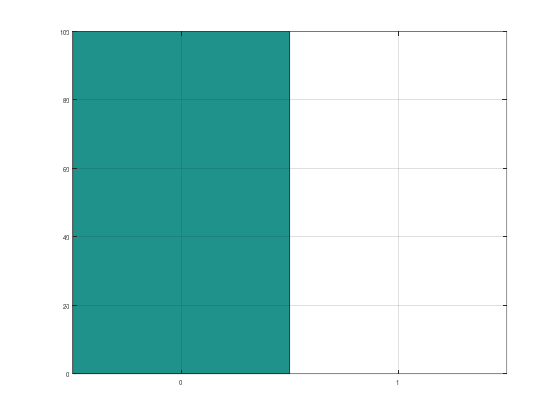

In [6]:
N = 100; medidas = zeros(1,N);
for i=1:N,
    rho = foton(0);
    medidas(i) = medida_estado(rho, Pi0, Pi1);
end
figure(31); hist(medidas, [0,1]);
axis([-0.5 1.5 0 100]); grid on;

> *Se debe tener en cuenta que este código simula un proceso de medida real, y que por tanto el resultado es binario. Para un fotón dado, `medida_estado` devuelve un único bit. Para estimar las correspondientes probabilidades de observación, repetimos el experimento 100 veces y mostramos el histograma resultante.*
> 
> *Se puede ver que se obtiene el resultado predicho en el Apartado 1.1. Para un fotón con polarización horizontal $\leftrightarrow$, una medida con respecto a la base $\leftrightarrow$/$\updownarrow$ siempre da el resultado asociado a esta polarización que en el código anterior se corresponde con el estado *'$\,0$'*.*

**2.2.** Simule ahora $100$ ejecuciones de un experimento en el que el fotón a medir está dado por $\rho = \ket{\theta}\bra{\theta}$ con $\theta=\pi/4$. Almacene y muestre los resultados obtenidos en un histograma. ¿Coinciden las frecuencias observadas con las probabilidades calculadas en el Apartado 2.1? Explique las diferencias, en caso de existir. 


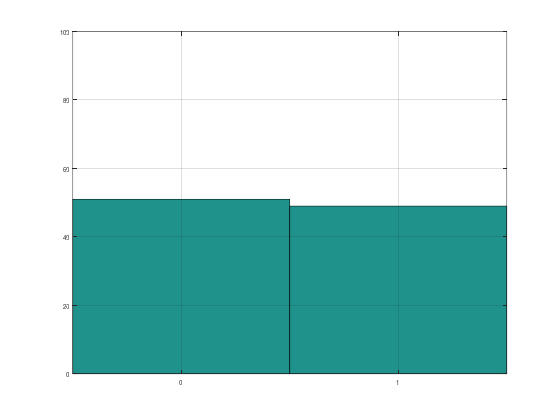

In [7]:
N = 100; medidas = zeros(1,N);
for i=1:N,
    rho = foton(pi/4);
    medidas(i) = medida_estado(rho, Pi0, Pi1);
end
figure(32); hist(medidas,[0,1]);
axis([-0.5 1.5 0 100]); grid on;

>*En este caso, para cada realización del experimento generamos un fotón con polarización $\theta=\pi/4$. Se puede ver que en este caso obtenemos medidas aleatorias de las dos polarizaciones $\leftrightarrow$/$\updownarrow$, como muestra el histograma para $N=100$ repeticiones.*
>
>*Aunque los resultados se aproximan a las probabilidades predichas en el Apartado 1.2, existen pequeñas variaciones debido al limitado número de realizaciones. Si se incrementa el número de repeticiones $N$, las frecuencias de los eventos convergerán a sus probabilidades teóricas debido a la ley de los grandes números.*

## 3. Medida de un estado mixto

Considere ahora un fotón que puede presentar una de las polarizaciones $\theta_1$ o $\theta_2$ con la misma probabilidad,
aunque no conocemos  cuál. Su matriz de densidad de probabilidad asociada está dada por
  \begin{align}
    \rho = \frac{1}{2} \ket{\theta_1} \bra{\theta_1} + \frac{1}{2} \ket{\theta_2} \bra{\theta_2}.
  \end{align}
Responda a las siguientes cuestiones, indicando el código empleado en su resolución:

**3.1.** Para $\theta_1=0$ y $\theta_2=\pi$, obtenga las probabilidades $\Pr\{\leftrightarrow\}$ y $\Pr\{\updownarrow\}$. Antes de su medida, ¿se encuentra el fotón $\rho$ en el mismo estado que en el Apartado 1.1? Justifique la respuesta.

In [8]:
rho = 1/2*foton(0)+1/2*foton(pi)
ej31_p0 = trace(Pi0*rho)
ej31_p1 = trace(Pi1*rho)
rho_0 = foton(0)

rho =

   1.0000e+00  -6.1230e-17
  -6.1230e-17   7.4983e-33

ej31_p0 = 1
ej31_p1 = 7.4983e-33
rho_0 =

   1   0
   0   0



>*Se obtiene $\Pr\{\leftrightarrow\}=0$ y $\Pr\{\updownarrow\}=1$, como en el Apartado 1.1. Si analizamos la matriz $\rho$ se puede ver que (salvo variaciones debido a la precisión numérica de Matlab):*
>
>$$\rho = \begin{bmatrix}1 & 0\\ 0 & 0\end{bmatrix}$$
>
>*que coincide con el estado cuántico definido en el Apartado 1.1. Esto es así porque las polarizaciones $\theta_1=0$ y $\theta_2=\pi$ se corresponden en ambos casos a un fotón con polarización horizontal (en un sistema cuántico no se puede distinguir con una medida si un fotón tiene una polarización $\rightarrow$ o $\leftarrow$).*

**3.2.** Para $\theta_1=0$ y $\theta_2=\pi/2$,  obtenga las probabilidades $\Pr\{\leftrightarrow\}$ y $\Pr\{\updownarrow\}$. Antes de su medida, ¿se encuentra el fotón $\rho$ en el mismo estado que en el Apartado 1.2? ¿Podría distinguir estos dos estados con una medida en la base $\leftrightarrow$/$\updownarrow$? ¿Y en alguna otra base?

In [9]:
rho = 1/2*foton(0)+1/2*foton(pi/2)
ej22_p0 = trace(Pi0*rho)
ej22_p1 = trace(Pi1*rho)
rho_pi4 = foton(pi/4)

rho =

   5.0000e-01   3.0615e-17
   3.0615e-17   5.0000e-01

ej22_p0 = 0.5000
ej22_p1 = 0.5000
rho_pi4 =

   0.5000   0.5000
   0.5000   0.5000



> *Las probabilidades de medir $\leftrightarrow$ y $\updownarrow$ son $\Pr\{\leftrightarrow\}=\Pr\{\updownarrow\}=1/2$.*
> *A pesar de que estas probabilidades coinciden con las obtenidas en el Apartado 1.2, en este caso no se trata del mismo estado cuántico. En el Apartado 1.2 teníamos el estado cuántico $\rho = \frac{1}{2}\bigl[\begin{smallmatrix}1 & 1\\ 1 & 1\end{smallmatrix}\bigr]$ y ahora, en cambio,*
>$$\rho = \frac{1}{2}\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}.$$
>
>*A pesar de que las probabilidades de observar $\leftrightarrow$ y $\updownarrow$ son las mismas, no es lo mismo un fotón con polarización diagonal que una mezcla probabilística de fotones  con polarizaciones $\leftrightarrow$ y $\updownarrow$. En una base de medida diferente se podrían diferenciar los dos experimentos (por ejemplo, con la base considerada en el Apartado 5).*


## 4. Colapso de la función de onda

Hasta ahora, al realizar la medida de un fotón, éste era descartado y un nuevo fotón era generado para la siguiente medida. Vamos a considerar ahora un experimento en el que un fotón se somete a dos medidas consecutivas:

**4.1.** Considere el fotón $\rho = \ket{\theta}\bra{\theta}$ con $\theta=\pi/4$. Asuma que se realiza su medida con respecto al POVM $\bigl\{\Pi_{0}, \Pi_{1}\bigr\}$ pero que no se observa su resultado. ¿Cuál es el nuevo estado $\rho'$ tras esta medida? ¿Coincide con el estado original? ¿Puede explicar por qué?

In [10]:
rho = foton(pi/4)
rho_prima = Pi0*rho*Pi0' + Pi1*rho*Pi1'

rho =

   0.5000   0.5000
   0.5000   0.5000

rho_prima =

   0.5000        0
        0   0.5000



>*Se obtiene*
>$$\rho = \frac{1}{2}\begin{bmatrix}1 & 1\\ 1 & 1\end{bmatrix},\quad\rho' = \frac{1}{2}\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}.$$
>
>*Al realizar una medida en la base $\leftrightarrow$/$\updownarrow$, un fotón con polarización diagonal colapsa a una de esas dos posibilidades. Si no se observa el resultado, el fotón resultante es una mezcla probabilística de fotones con polarizaciones $\leftrightarrow$ y $\updownarrow$, tal y cómo se ha generado en el Apartado 3.2.*

**4.2.** Considere ahora el fotón
  \begin{align}
    \rho = \frac{1}{2} \ket{\theta_1} \bra{\theta_1} + \frac{1}{2} \ket{\theta_2} \bra{\theta_2}.
  \end{align}
  con $\theta_1=0$ y $\theta_2=\pi/2$.
  Asuma que se realiza su medida con respecto al POVM $\bigl\{\Pi_{0}, \Pi_{1}\bigr\}$ pero que no se observa su resultado.
  ¿Cuál es el nuevo estado $\rho'$ tras esta medida? ¿Coincide con el estado previo a la medida?
  ¿Puede explicar por qué?

In [11]:
rho = 1/2*foton(0)+1/2*foton(pi/2)
rho_prima = Pi0*rho*Pi0' + Pi1*rho*Pi1'

rho =

   5.0000e-01   3.0615e-17
   3.0615e-17   5.0000e-01

rho_prima =

   0.5000        0
        0   0.5000



>*En este caso partimos de una mezcla probabilística de fotones con polarizaciones $\leftrightarrow$ y $\updownarrow$.
Cuando aplicamos una medida en la base $\leftrightarrow$/$\updownarrow$, obtenemos*
>
>$$\rho = \frac{1}{2}\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix},\quad \rho' = \frac{1}{2}\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}.$$
>
>*Vemos que el estado no cambia porque la medida se realiza alineada con los fotones que teníamos en primer lugar.*

## 5. Bases de medida (ejercicio opcional)

En los previos apartados se ha considerado siempre una medida con respecto a la base $\leftrightarrow$/$\updownarrow$.
Sin embargo, podría diseñarse un montaje experimental para otras bases de medida. Por ejemplo, considere el POVM
  \begin{align}
      \Pi_{+} &= \frac{1}{2}\biggl[\begin{matrix} +1&+1\\+1&+1 \end{matrix}\biggr]
       &\text{(polarización diagonal),}\\
      \Pi_{-} &= \frac{1}{2}\biggl[\begin{matrix} +1&-1\\-1&+1 \end{matrix}\biggr]
       &\text{(polarización diagonal cruzada).}
  \end{align}

**5.1.** Repita el Ejercicio 1 con esta nueva base de medida. Explique las diferencias observadas.

**5.2.** Repita el Ejercicio 4 con esta nueva base de medida. Explique las diferencias observadas.
